In [1]:
import os
import sys
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings; warnings.simplefilter('ignore')

sns.set(font_scale=1.5)
sns.set_style('white')

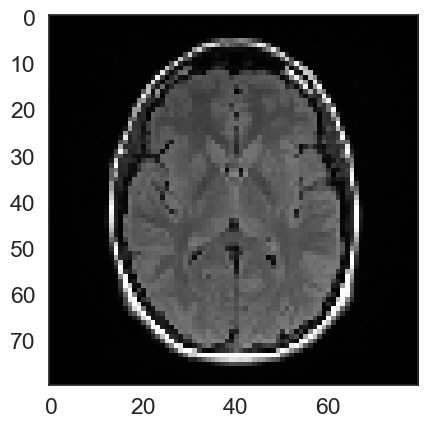

In [4]:
import cv2 

filepath_no = 'data/brain_tumor_dataset/no'
filepath_yes = 'data/brain_tumor_dataset/yes'

gtFr = pd.DataFrame()

X = []
y = []

for f in os.listdir(filepath_no):
    if ('._' not in f):
        new_row={'path':filepath_no,'filename':f,'gt':0}
        gtFr = gtFr.append(new_row,ignore_index=True)
        
        img_array = cv2.imread(os.path.join(filepath_no,f),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        plt.imshow(new_img_array,cmap="gray")
        
        X.append(new_img_array)

In [5]:
for f in os.listdir(filepath_yes):
    if ('._' not in f):
        new_row={'path':filepath_yes,'filename':f,'gt':1}
        gtFr = gtFr.append(new_row,ignore_index=True)
        
gtFr = gtFr.reset_index(drop=False).rename(columns={'index':'fileID'})

gtFr['gt'].value_counts()

1    155
0     98
Name: gt, dtype: int64

In [6]:
gtFr.set_index(['fileID']).to_csv('data/gt.csv')